In [ ]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time


In [ ]:
from google.colab import files

uploaded=files.upload()



In [4]:
uploaded2=files.upload() 

Saving validation.csv to validation.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['new_new_york_taxi_set.csv']))   # reading new_new_york_taxi_set.csv into a pandas dataframe df
df2 = pd.read_csv(io.BytesIO(uploaded2['validation.csv']))            # reading validation.csv into a pandas dataframe df2


In [20]:
# Here, X is number of neurons I want in my hidden layers. All my hidden layers have same number of neurons. X belongs to {10,10,15,20,30}

# w_1 is X-cross-6. b_1, b_2, ...., b_9 are X-cross-1. b_10 is 1-cross-1. 

# If I have 8 hidden layers, then, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9 are X-cross-X variables. So, all w_i of hidden layer are X-cross-X.

# If I have 8 hidden layers, w_10 is 1-cross-X. So, the w_i at last output layer, that has only 1 neuron, is 1-cross-X.

# The i in w_i and b_i, shows the layer number. i can be {1,2,...,10}. The number of hidden layers varies from {1,2,4,6,8}  



start = time.perf_counter()                                         # start timer 

mu, sigma = 20, 0.1                                                 # initialization parameters

x = tf.placeholder(tf.float64, shape=(6,1), name='xx')              # Take x as a placeholder from session. Graph is made by this. When we do session.run(), is when value is assignedd here. Tensor of x has shape 6-cross-1.
y = tf.placeholder(tf.float64,shape=(1,1), name='yy')               # This is the difference between placeholder and variable, i.e, placeholders dont need to be initialized. Tensor of y has shape 1-cross-1. 

w_1= tf.Variable(np.random.normal(mu,sigma,60).reshape(10,6))       # w_i and b_i are tensor Variables. w_i are initialized as np.array, that has values which are picked from a normal distribution, whose mean mu and variance sigma we already specifed. 
b_1= tf.Variable(np.random.normal(mu,sigma,10).reshape(10,1))       # b_i are tensors made from X-cross-1 vectors. Here, X can be 10, 10, 15, 20, 30; which are the number of neurons that we want in our hidden layers. w1 and b1 are the variables of the 1st input layer. (w1.x+b1), which is an X-cross-1 vector is output of 1st layer. 
                                                                    # 1st layer has 6 neurons. Thats why w1 has 6 columns: each entry corresponding to weight of one of the 6 features in giving output, which is the taxi fare. Input to 1st layer is 6-cross-1 x, and output is an X-cross-1 tensor 'fin_1'.
w_2=tf.Variable(np.random.normal(mu,sigma,100).reshape((10,10)))  
b_2=tf.Variable(np.random.normal(mu,sigma,10).reshape((10,1)))

w_3=tf.Variable(np.random.normal(mu,sigma,100).reshape((10,10)))  
b_3=tf.Variable(np.random.normal(mu,sigma,10).reshape((10,1)))

w_4=tf.Variable(np.random.normal(mu,sigma,100).reshape((10,10)))
b_4=tf.Variable(np.random.normal(mu,sigma,10).reshape((10,1)))

w_5=tf.Variable(np.random.normal(mu,sigma,100).reshape((10,10)))
b_5=tf.Variable(np.random.normal(mu,sigma,10).reshape((10,1)))

w_6=tf.Variable(np.random.normal(mu,sigma,100).reshape((10,10)))
b_6=tf.Variable(np.random.normal(mu,sigma,10).reshape((10,1)))

w_7=tf.Variable(np.random.normal(mu,sigma,100).reshape((10,10)))
b_7=tf.Variable(np.random.normal(mu,sigma,10).reshape((10,1)))

w_8=tf.Variable(np.random.normal(mu,sigma,100).reshape((10,10)))
b_8=tf.Variable(np.random.normal(mu,sigma,10).reshape((10,1)))

w_9=tf.Variable(np.random.normal(mu,sigma,100).reshape((10,10)))
b_9=tf.Variable(np.random.normal(mu,sigma,10).reshape((10,1)))

w_10=tf.Variable(np.random.normal(mu,sigma,10).reshape((1,10)))
b_10=tf.Variable(np.random.normal(mu,sigma,1).reshape((1,1)))





temp_1=tf.matmul(w_1,x)             # temp_1=w_1.x  So, temp_1 is X-cross-1. x is 6-cross-1, and is input to this layer.
fin1=tf.add(temp_1,b_1)             # fin1= w_1.x+b_1
fin_1 = tf.math.tanh(fin1)          # fin_1= tanh(w_1.x+b_1). tanh is an activation function here. fin_1 is X-cross-1, and is output of this layer.

temp_2=tf.matmul(w_2,fin_1)         # temp_2=w_2.fin_1  So, temp_2 is X-cross-1. This is the first inner layer. fin_1 is input to this layer.
fin2=tf.add(temp_2,b_2)             # fin2= w_2.fin_1+b_2
fin_2 = tf.math.tanh(fin2)          # fin_2= tanh(w_2.fin_1+b_2). tanh is an activation function here. fin_2 is X-cross-1, and is output of this layer.

temp_3=tf.matmul(w_3,fin_2)         # temp_3=w_3.fin_2  So, temp_3 is X-cross-1. fin_2 is input to this layer.
fin3=tf.add(temp_3,b_3)             # fin3= w_3.fin_2+b_3
fin_3 = tf.math.tanh(fin3)          # fin_3= tanh(w_3.fin_2+b_3). tanh is an activation function here.fin_3 is X-cross-1, and is output of this layer.

temp_4=tf.matmul(w_4,fin_3)         # temp_4=w_4.fin_3  So, temp_4 is X-cross-1.fin_3 is input to this layer.
fin4=tf.add(temp_4,b_4)             # fin4= w_4.fin_3+b_4. 
fin_4 = tf.math.tanh(fin4)          # fin_4= tanh(w_4.fin_3+b_4). tanh is an activation function here.fin_4 is X-cross-1, and is output of this layer.

temp_5=tf.matmul(w_5,fin_4)         # temp_5=w_5.fin_4  So, temp_5 is X-cross-1.fin_4 is input to this layer.
fin5=tf.add(temp_5,b_5)             # fin5= w_5.fin_4+b_5
fin_5 = tf.math.tanh(fin5)          # fin_5= tanh(w_5.fin_4+b_5). tanh is an activation function here.fin_5 is X-cross-1, and is output of this layer.

temp_6=tf.matmul(w_6,fin_5)         # temp_6=w_6.fin_5  So, temp_6 is X-cross-1.fin_5 is input to this layer.
fin6=tf.add(temp_6,b_6)             # fin6= w_6.fin_5+b_6
fin_6 = tf.math.tanh(fin6)          # fin_6= tanh(w_6.fin_5+b_6). tanh is an activation function here.fin_6 is X-cross-1, and is output of this layer.

temp_7=tf.matmul(w_7,fin_6)         # temp_7=w_7.fin_6  So, temp_7 is X-cross-1.fin_6 is input to this layer.
fin7=tf.add(temp_7,b_7)             # fin7= w_7.fin_6+b_7
fin_7 = tf.math.tanh(fin7)          # fin_7= tanh(w_7.fin_6+b_7). tanh is an activation function here.fin_7 is X-cross-1, and is output of this layer.

temp_8=tf.matmul(w_8,fin_7)         # temp_8=w_8.fin_7  So, temp_8 is X-cross-1.fin_7 is input to this layer.
fin8=tf.add(temp_8,b_8)             # fin8= w_8.fin_7+b_8
fin_8 = tf.math.tanh(fin8)          # fin_8= tanh(w_8.fin_7+b_8). tanh is an activation function here.fin_8 is X-cross-1, and is output of this layer.

temp_9=tf.matmul(w_9,fin_8)         # temp_9=w_9.fin_8  So, temp_9 is X-cross-1.fin_8 is input to this layer.
fin9=tf.add(temp_9,b_9)             # fin9= w_9.fin_8+b_9
fin_9 = tf.math.tanh(fin9)          # fin_9= tanh(w_9.fin_8+b_9). tanh is an activation function here. This is the last hidden layer. fin_9 is X-cross-1, and is output of this layer.

temp_10=tf.matmul(w_10,fin_9)       # temp_10=w_10.fin_9  So, temp_10 is X-cross-1.fin_9 is input to this layer. 
fin10=tf.add(temp_10,b_10)          # fin10= w_10.fin_9+b_10. fin_10 is 1-cross-1, and is output of this layer.




out=fin10                                                                    # out is the final 1-cross-1 tensor output of neural network

dif=tf.subtract(out,y)                                                       # finding difference between out, which is our predicted value, and y, which is the true value for the 6-cross-1 input x.
loss=tf.square(dif)                   




optimizer = tf.train.AdamOptimizer(0.1)                                      # AdamOptimiser. I fixed learning rate alpha as 0.1.
train_op = optimizer.minimize(loss)    

with tf.Session() as session:                                                # Session started
 
  inp=np.zeros((6,1))                                                        # inp is the 6-cross-1 input vector. Value of inp will be passed to x. 
 
  epoch=500000000                                                            # This is the no. of epochs. It has being given a large value since I am implementing early stopping. So, my epochs will keep going till the test_RMSE of an epoch is greater than its previous RMSE, in which case, the model trained with the previous epoch will be final, and we'll break out of the epoch loop. 
 
  init = tf.global_variables_initializer()                                   # All global variables, will be intialized by this.

  session.run(tf.global_variables_initializer())
  err_list=list()                                                            # This is a list of all total losses of all sample points, in 1 epoch, i.e, a list of summ.                      

  labelEncoder = LabelEncoder()
  labelEncoder.fit(df['pickup_datetime'])                                    # This function will take the date as a string, and convert it to a numerical quantity. Since this is applied to all dates, the relationship in dates wont be lost.
  df['pickup_datetime'] = labelEncoder.transform(df['pickup_datetime'])

  labelEncoder.fit(df2['pickup_datetime'])
  df2['pickup_datetime'] = labelEncoder.transform(df2['pickup_datetime'])
 
  ult=1000000000
  summ=0                                                                     # summ has sum of all losses for all the training inputs fed to neural network, in one epoch.
  batch_size=2                                                               # batch_size is the interval of inputs after which we update w_i and b_i; via AdamOptimiser.

  epoch_time_lst=list()                                                      # this is a list of time taken for 1 epoch, across all epochs, until we break out after getting a higher RMSE than previous epoch.

  for j in range(0,epoch):

    epoch_start_time= time.perf_counter()                                    # timer for epoch start
    batch_count=0 
   
    for i in range(df.shape[0]) : 
     
      inp[0]=df.loc[i, "pickup_datetime"]
      yy=0
    
      inp[1]= df.loc[i, "pickup_longitude"]                                  # training data sample fed into inp, from df dataframe
      inp[2]=df.loc[i, "pickup_latitude"]
      inp[3]=df.loc[i, "dropoff_longitude"]
      inp[4]=df.loc[i, "dropoff_latitude"]
      inp[5]=df.loc[i, "passenger_count"]                                 

      yy=df.loc[i,"fare_amount"]                                             # training data output


      y_tense=np.zeros((1,1))
      y_tense[0][0]=yy
      
      feed_dict = { x: inp, y: y_tense}                                      # inp and y_tense are fed into x,y values of placeholder via feed_dict.

      
      loss_got=session.run(loss,feed_dict)[0][0]                             # This is where I run session to get loss. As w_i, b_i are  needed for this, tensorflow graph will compute them, and compute loss, and return a 1-cross-1 array.
     
      summ+=loss_got                                                         # loss across all samples is iteratively added to summ. After the epoch, the RMSE of this summ is appended to err_list.
    
      if(batch_count%batch_size==0):  
        session.run(train_op,feed_dict)                                      # Batch size. This is where AdamOptimiser called.
      batch_count+=1                                                         # By this, we ensure that only when batch_count is even, or batch_size=2, is when w_i and b_i are modified by GradientDescent. 

    epoch_end_time= time.perf_counter()
    epoch_time_lst.append(epoch_end_time-epoch_start_time)                   # epoch_time added to epoch_time_lst
 
    if(summ>ult):                                                            # Early stopping
      break                                                                               
    if(j!=0):  
      ult=summ

    
    err_list.append(np.sqrt(summ/df.shape[0]))                               # Compute RMSE of epoch.
    summ=0 

  print("Error of each epoch: ",err_list)

  print("Epoch_times: ",epoch_time_lst)


  #  TEST DATA ON TRAINED MODEL

  ult=1000000000                                                    
  summ=0
  batch_size=2
  



  for i in range(df2.shape[0]) : 
    inp[0]=df2.loc[i, "pickup_datetime"]
    yy=0
    inp[1]= df2.loc[i, "pickup_longitude"]
    inp[2]=df2.loc[i, "pickup_latitude"]
    inp[3]=df2.loc[i, "dropoff_longitude"]
    inp[4]=df2.loc[i, "dropoff_latitude"]
    inp[5]=df2.loc[i, "passenger_count"]

    yy=df2.loc[i,"fare_amount"]



    y_tense=np.zeros((1,1))
    y_tense[0][0]=yy
  
    feed_dict = {x: inp, y: y_tense} 

    
    loss_got=session.run(loss,feed_dict)[0][0]                               # loss_got is actually the square of the error. 
  
    summ+=loss_got
    y_out=session.run(out,feed_dict)[0][0]                                          
    



  print("Test RMSE error: ",np.sqrt(summ/df2.shape[0]))                      # Compute RMSE


  elapsed = time.perf_counter() - start
  print('Elapsed %.3f seconds.' % elapsed)                                   # Total execution time of programme

Error of each epoch:  [20.62845130711293, 9.81938424453805, 9.817789159943672]
Epoch_times:  [17.570662218999132, 16.86260164899977, 18.038354338001227, 17.644925261000026]
Test RMSE error:  9.490713960462408
Elapsed 75.282 seconds.


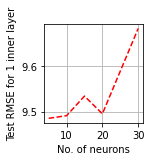

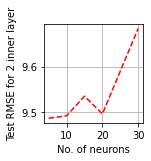

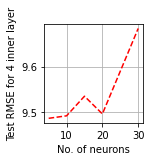

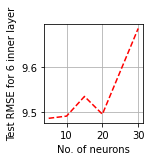

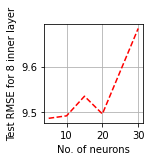

In [0]:
no_neurons=[5,10,15,20,30]
test_rmse_lst_1_layer=[9.484940624412207,9.490749679947562,9.534213482744976,9.494937858187168,9.684310754776556]  # test_rmse for no. of hidden layers=1. Every RMSE for a given no. of hidden layers is for 5, 10, 15, 20, 30 neurons in each hidden layer, respectively.
test_rmse_lst_2_layer=[9.485241945286925,9.490746598472864,9.534189461563852,9.494938629272601,9.684311832759356]
test_rmse_lst_4_layer=[9.4852419389164,9.490748778614062,9.534178210583951,9.494936070057676,9.684311811300702]
test_rmse_lst_6_layer=[9.485902832832021,9.490749809794034,9.534217198065976,9.494940927079748,9.684310771895532]
test_rmse_lst_8_layer=[9.485242046758994,9.490714140099996,9.534182339295494,9.494934737169235,9.684310697014213]

plt.figure()
plt.subplot(231)
plt.grid(True)
plt.plot(no_neurons,test_rmse_lst_1_layer,'r--')
plt.xlabel('No. of neurons')
plt.ylabel('Test RMSE for 1 inner layer')


plt.figure()
plt.subplot(232)
plt.grid(True)
plt.plot(no_neurons,test_rmse_lst_2_layer,'r--')
plt.xlabel('No. of neurons')
plt.ylabel('Test RMSE for 2 inner layer')

plt.figure()
plt.subplot(233)
plt.grid(True)
plt.plot(no_neurons,test_rmse_lst_4_layer,'r--')
plt.xlabel('No. of neurons')
plt.ylabel('Test RMSE for 4 inner layer')

plt.figure()
plt.subplot(234)
plt.grid(True)
plt.plot(no_neurons,test_rmse_lst_6_layer,'r--')
plt.xlabel('No. of neurons')
plt.ylabel('Test RMSE for 6 inner layer')

plt.figure()
plt.subplot(235)
plt.grid(True)
plt.plot(no_neurons,test_rmse_lst_8_layer,'r--')
plt.xlabel('No. of neurons')
plt.ylabel('Test RMSE for 8 inner layer')


plt.show()

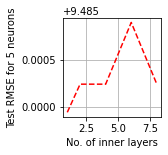

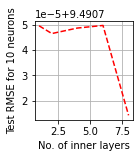

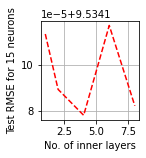

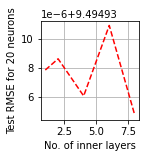

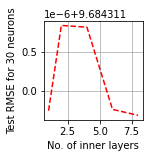

In [0]:
no_layers=[1,2,4,6,8]
test_rmse_5_neurons=[9.484940624412207,9.485241945286925,9.4852419389164,9.485902832832021,9.485242046758994] # Test_RMSE for 5 neurons in hidden layer. Every RMSE is for no. of hidden layers= 1, 2, 4, 6, 8 respectively.
test_rmse_10_neurons=[9.490749679947562,9.490746598472864,9.490748778614062,9.490749809794034,9.490714140099996]
test_rmse_15_neurons=[9.534213482744976,9.534189461563852,9.534178210583951,9.534217198065976,9.534182339295494]
test_rmse_20_neurons=[9.494937858187168,9.494938629272601,9.494936070057676,9.494940927079748,9.494934737169235]
test_rmse_30_neurons=[9.684310754776556,9.684311832759356,9.684311811300702,9.684310771895532,9.684310697014213]

plt.figure()
plt.subplot(231)
plt.grid(True)
plt.plot(no_layers,test_rmse_5_neurons,'r--')
plt.xlabel('No. of inner layers')
plt.ylabel('Test RMSE for 5 neurons')


plt.figure()
plt.subplot(232)
plt.grid(True)
plt.plot(no_layers,test_rmse_10_neurons,'r--')
plt.xlabel('No. of inner layers')
plt.ylabel('Test RMSE for 10 neurons')

plt.figure()
plt.subplot(233)
plt.grid(True)
plt.plot(no_layers,test_rmse_15_neurons,'r--')
plt.xlabel('No. of inner layers')
plt.ylabel('Test RMSE for 15 neurons')

plt.figure()
plt.subplot(234)
plt.grid(True)
plt.plot(no_layers,test_rmse_20_neurons,'r--')
plt.xlabel('No. of inner layers')
plt.ylabel('Test RMSE for 20 neurons')

plt.figure()
plt.subplot(235)
plt.grid(True)
plt.plot(no_layers,test_rmse_30_neurons,'r--')
plt.xlabel('No. of inner layers')
plt.ylabel('Test RMSE for 30 neurons')


plt.show()


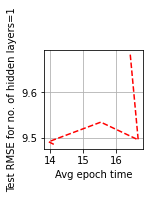

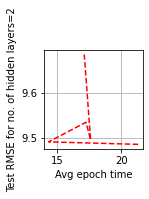

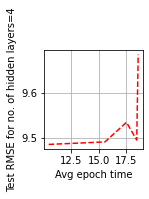

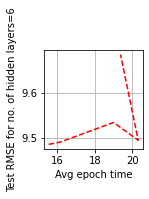

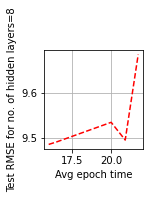

In [13]:
# For no. of hidden layers=1
epoch_times_5_neurons_1_layer=[14.871137651000026, 13.570384841001214, 13.88249884600009] #  I used early stopping in my program. So, only epoch times of those iterations are there, which gave a better RMSE than the previous one. 
epoch_times_10_neurons_1_layer=[14.685702896000294, 13.824583472000086, 13.550479282999731, 13.752716221999435]
epoch_times_15_neurons_1_layer=[16.119246821999695, 15.360740249001537, 15.284523345999332, 15.350034574999881]
epoch_times_20_neurons_1_layer=[17.868733545001305, 16.198592030999862, 16.308716334002384, 16.259773826997844]
epoch_times_30_neurons_1_layer=[17.32878567700027, 16.060801800998888, 16.172498924999672, 16.114753481000662, 16.416920325998944]

# For no. of hidden layers=2
epoch_times_5_neurons_2_layer=[21.697007921000477, 20.93782656300027, 20.91623797200009, 20.760044058999483, 21.89751109200006, 21.76080045499839]  
epoch_times_10_neurons_2_layer=[14.965459798997472, 14.385745997999038, 13.956001604998164, 14.06257141900278]
epoch_times_15_neurons_2_layer=[18.671506812999723, 16.603440939001302, 16.966852713001572, 16.77439511099874]
epoch_times_20_neurons_2_layer=[18.071632928997133, 18.73847734899755, 16.630607307997707, 17.02174010499948]
epoch_times_30_neurons_2_layer=[17.69449215699933, 17.14842911699816, 16.988785511999595, 16.810753286001272, 16.945490025002073]

# For no. of hidden layers=4
epoch_times_5_neurons_4_layer=[13.373188697158605, 9.703955928009178, 9.702230603159084, 9.70211630190503, 9.702114409491298]  
epoch_times_10_neurons_4_layer=[17.491342206998524, 14.988746151997475, 14.973542265001015, 14.820126185000845] 
epoch_times_15_neurons_4_layer=[18.168999838999298, 17.3939374770016, 17.21373718399991, 17.33145760199841] #This means, for 4 hidden layers with 15 neurons EACH, the number of elements in list is the number of epochs that took place, and epoch time is the entry in the list.
epoch_times_20_neurons_4_layer=[18.884539616003167, 18.373712567998155, 18.338266222999664, 18.251989608001168]
epoch_times_30_neurons_4_layer=[18.86760795200098, 17.947390000001178, 19.648128980003094, 18.522724637001375, 17.99134933499954]

# For no. of hidden layers=6
epoch_times_5_neurons_6_layer= [16.137721058999887, 16.31683720699948, 15.107018773000163, 15.034416644000885, 15.131612571000005] 
epoch_times_10_neurons_6_layer=[17.07463467100024, 16.008795460002148, 15.680057773999579, 15.831174379000004]
epoch_times_15_neurons_6_layer=[19.179884443001356, 18.779515409998567, 18.64876903699769, 19.421667107002577]
epoch_times_20_neurons_6_layer=[20.113473908000742, 19.56500863799738, 19.370590705999348, 22.231488797002385]
epoch_times_30_neurons_6_layer=[19.869464693001646, 18.99948091999977, 19.60865139299858, 19.292971265000233, 19.116937839997263]

# For no. of hidden layers=8
epoch_times_5_neurons_8_layer= [16.489735160001146, 15.804078242999822, 16.092863080000825, 16.147970229001658, 15.460394667999935, 15.913139457999932] 
epoch_times_10_neurons_8_layer=[17.05362054700163, 16.175794117996702, 16.54727813000136, 16.18309016800049]   
epoch_times_15_neurons_8_layer=[20.086583292002615, 20.26363766400027, 19.93664997900123, 19.666001457000675]
epoch_times_20_neurons_8_layer=[22.14329101399926, 20.464176825000322, 20.46212871899843, 20.482320358001743]
epoch_times_30_neurons_8_layer= [26.200624151002557, 20.902267943998595, 20.3123158840026, 20.517774078998627, 20.66734335699948]

# test_rmse. For a given no. of layers, the 'i'th entry in list represents the RMSE due to 5,10,15,20,30 neurons respectively.
test_rmse_lst_1_layer=[9.484940624412207,9.490749679947562,9.534213482744976,9.494937858187168,9.684310754776556]
test_rmse_lst_2_layer=[9.485241945286925,9.490746598472864,9.534189461563852,9.494938629272601,9.684311832759356]
test_rmse_lst_4_layer=[9.4852419389164,9.490748778614062,9.534178210583951,9.494936070057676,9.684311811300702]
test_rmse_lst_6_layer=[9.485902832832021,9.490749809794034,9.534217198065976,9.494940927079748,9.684310771895532]
test_rmse_lst_8_layer=[9.485242046758994,9.490714140099996,9.534182339295494,9.494934737169235,9.684310697014213]

# Across given no. of hidden layers, make a list of average epoch times for 5,10,15,20,30 neurons, in each layer.
avg_epoch_times_1_layer=[np.mean(epoch_times_5_neurons_1_layer),np.mean(epoch_times_10_neurons_1_layer),np.mean(epoch_times_15_neurons_1_layer),np.mean(epoch_times_20_neurons_1_layer),np.mean(epoch_times_30_neurons_1_layer)] 
avg_epoch_times_2_layer=[np.mean(epoch_times_5_neurons_2_layer),np.mean(epoch_times_10_neurons_2_layer),np.mean(epoch_times_15_neurons_2_layer),np.mean(epoch_times_20_neurons_2_layer),np.mean(epoch_times_30_neurons_2_layer)] 
avg_epoch_times_4_layer=[np.mean(epoch_times_5_neurons_4_layer),np.mean(epoch_times_10_neurons_4_layer),np.mean(epoch_times_15_neurons_4_layer),np.mean(epoch_times_20_neurons_4_layer),np.mean(epoch_times_30_neurons_4_layer)] 
avg_epoch_times_6_layer=[np.mean(epoch_times_5_neurons_6_layer),np.mean(epoch_times_10_neurons_6_layer),np.mean(epoch_times_15_neurons_6_layer),np.mean(epoch_times_20_neurons_6_layer),np.mean(epoch_times_30_neurons_6_layer)] 
avg_epoch_times_8_layer=[np.mean(epoch_times_5_neurons_8_layer),np.mean(epoch_times_10_neurons_8_layer),np.mean(epoch_times_15_neurons_8_layer),np.mean(epoch_times_20_neurons_8_layer),np.mean(epoch_times_30_neurons_8_layer)] 


plt.figure()
plt.subplot(231)
plt.grid(True)
plt.plot(avg_epoch_times_1_layer,test_rmse_lst_1_layer,'r--')
plt.xlabel('Avg epoch time')
plt.ylabel('Test RMSE for no. of hidden layers=1')
# for i_x, i_y in zip(avg_epoch_times_1_layer,test_rmse_lst_1_layer):
#     plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))


plt.figure()
plt.subplot(232)
plt.grid(True)
plt.plot(avg_epoch_times_2_layer,test_rmse_lst_2_layer,'r--')
plt.xlabel('Avg epoch time')
plt.ylabel('Test RMSE for no. of hidden layers=2')
# for i_x, i_y in zip(avg_epoch_times_2_layer,test_rmse_lst_2_layer):
#     plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))

plt.figure()
plt.subplot(233)
plt.grid(True)
plt.plot(avg_epoch_times_4_layer,test_rmse_lst_4_layer,'r--')
plt.xlabel('Avg epoch time')
plt.ylabel('Test RMSE for no. of hidden layers=4')
# for i_x, i_y in zip(avg_epoch_times_4_layer,test_rmse_lst_4_layer):
#     plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))

plt.figure()
plt.subplot(234)
plt.grid(True)
plt.plot(avg_epoch_times_6_layer,test_rmse_lst_6_layer,'r--')
plt.xlabel('Avg epoch time')
plt.ylabel('Test RMSE for no. of hidden layers=6')
# for i_x, i_y in zip(avg_epoch_times_6_layer,test_rmse_lst_6_layer):
#     plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))

plt.figure()
plt.subplot(235)
plt.grid(True)
plt.plot(avg_epoch_times_8_layer,test_rmse_lst_8_layer,'r--')
plt.xlabel('Avg epoch time')
plt.ylabel('Test RMSE for no. of hidden layers=8')
# for i_x, i_y in zip(avg_epoch_times_8_layer,test_rmse_lst_8_layer): 
#     plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))


plt.show()



Text(0, 0.5, 'TPU total_time')

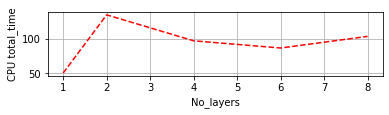

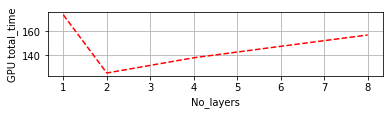

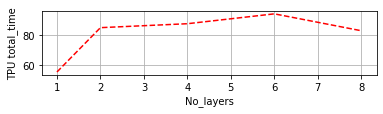

In [11]:
# For the number of neurons with the least RMSE,i.e, 5 neurons, here are the execution times of program when coupled with GPU, when coupled with TPU, and when run just with CPU.
cpu_total_time=[50.664,134.124,96.869,86.526,103.187]
gpu_total_time=[173.707,125.421,138.069,147.564,156.994]
tpu_total_time=[55.235,85.106,87.765,94.416,83.027]

no_layers=[1,2,4,6,8]

plt.figure()
plt.subplot(311)
plt.grid(True)
plt.plot(no_layers,cpu_total_time,'r--')
plt.xlabel('No_layers')
plt.ylabel('CPU total_time')

plt.figure()
plt.subplot(312)
plt.grid(True)
plt.plot(no_layers,gpu_total_time,'r--')
plt.xlabel('No_layers')
plt.ylabel('GPU total_time')

plt.figure()
plt.subplot(311)
plt.grid(True)
plt.plot(no_layers,tpu_total_time,'r--')
plt.xlabel('No_layers')
plt.ylabel('TPU total_time')



Text(0, 0.5, 'TPU total_time')

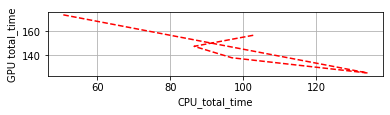

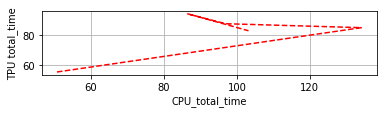

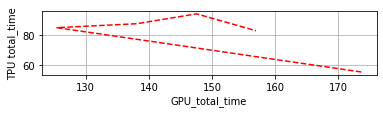

In [14]:
# Compare CPU, GPU, TPU total execution times for 5 neurons.
cpu_total_time=[50.664,134.124,96.869,86.526,103.187]
gpu_total_time=[173.707,125.421,138.069,147.564,156.994]
tpu_total_time=[55.235,85.106,87.765,94.416,83.027]

plt.figure()
plt.subplot(311)
plt.grid(True)
plt.plot(cpu_total_time,gpu_total_time,'r--')
plt.xlabel('CPU_total_time')
plt.ylabel('GPU total_time')

plt.figure()
plt.subplot(312)
plt.grid(True)
plt.plot(cpu_total_time,tpu_total_time,'r--')
plt.xlabel('CPU_total_time')
plt.ylabel('TPU total_time')

plt.figure()
plt.subplot(313)
plt.grid(True)
plt.plot(gpu_total_time,tpu_total_time,'r--')
plt.xlabel('GPU_total_time')
plt.ylabel('TPU total_time')

Text(0, 0.5, 'Avg_TPU_epoch_time')

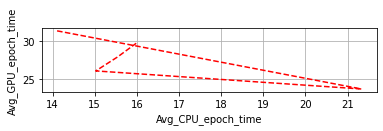

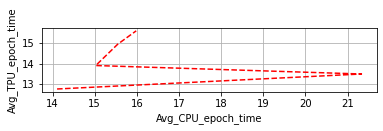

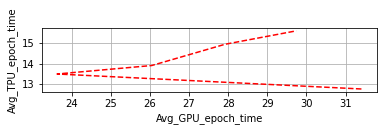

In [19]:
# Compare average epoch_time across all layers, i,e, 5, 10, 15, 20, 30 layers for CPU, GPU, TPU. For a given layer, every entry in list if for 5, 10, 15, 20, 30 neurons respectively.
cpu_epoch_time_1_layer=[14.871137651000026, 13.570384841001214, 13.88249884600009]
cpu_epoch_time_2_layer=[21.697007921000477, 20.93782656300027, 20.91623797200009, 20.760044058999483, 21.89751109200006, 21.76080045499839]
cpu_epoch_time_4_layer=[15.667200951000268, 14.616841387000022, 15.187415093001619, 15.658302177002042, 14.339111936998961, 14.682954763000453]
cpu_epoch_time_6_layer=[16.137721058999887, 16.31683720699948, 15.107018773000163, 15.034416644000885, 15.131612571000005]
cpu_epoch_time_8_layer=[16.489735160001146, 15.804078242999822, 16.092863080000825, 16.147970229001658, 15.460394667999935, 15.913139457999932]

gpu_epoch_time_1_layer=[32.920902816999956, 30.682865708999998, 31.517461511000022, 31.618516493000016, 30.282225438999944]
gpu_epoch_time_2_layer=[23.716833768000015, 23.546028430000206, 23.819105601000047, 23.61636412000007, 23.456103025999937]
gpu_epoch_time_4_layer=[25.95479716900013, 25.97528958099997, 25.896716647999938, 26.596347640999966, 25.813325824999993]
gpu_epoch_time_6_layer=[28.275558364000062, 27.858863534999955, 27.646583238999938, 28.104181414000095, 27.728599037000095]
gpu_epoch_time_8_layer=[30.51595785699999, 29.335047854000095, 29.452477950000002, 29.43555057499998, 29.966822579999985]

tpu_epoch_time_1_layer=[12.807208339999988, 12.720954161999998, 12.637245831999962, 12.846305995000193]
tpu_epoch_time_2_layer=[13.611614847000055, 13.559507592999807, 13.472605785000042, 13.389979267999934, 13.432818914000109, 13.482772798000042]
tpu_epoch_time_4_layer=[13.934606016999851, 13.92770768399987, 13.903862027999821, 13.889206176000016, 13.909360985000149, 13.887494069000013]
tpu_epoch_time_6_layer=[14.971456528999624, 14.831418586999916, 14.8366947049999, 14.847019003000241, 15.406976995999685, 14.847675268999865]
tpu_epoch_time_8_layer=[15.493030053999973, 15.322325093000018, 15.354744022999967, 16.162951293999868, 15.753324037000311]

avg_cpu_epoch_time=[np.mean(cpu_epoch_time_1_layer),np.mean(cpu_epoch_time_2_layer),np.mean(cpu_epoch_time_4_layer),np.mean(cpu_epoch_time_6_layer),np.mean(cpu_epoch_time_8_layer) ]
avg_gpu_epoch_time=[np.mean(gpu_epoch_time_1_layer),np.mean(gpu_epoch_time_2_layer),np.mean(gpu_epoch_time_4_layer),np.mean(gpu_epoch_time_6_layer),np.mean(gpu_epoch_time_8_layer)]
avg_tpu_epoch_time=[np.mean(tpu_epoch_time_1_layer),np.mean(tpu_epoch_time_2_layer),np.mean(tpu_epoch_time_4_layer),np.mean(tpu_epoch_time_6_layer),np.mean(tpu_epoch_time_8_layer)]

plt.figure()
plt.subplot(311)
plt.grid(True)
plt.plot(avg_cpu_epoch_time,avg_gpu_epoch_time,'r--')
plt.xlabel('Avg_CPU_epoch_time')
plt.ylabel('Avg_GPU_epoch_time')
# for i_x, i_y in zip(x, y):
#     plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))

plt.figure()
plt.subplot(312)
plt.grid(True)
plt.plot(avg_cpu_epoch_time,avg_tpu_epoch_time,'r--')
plt.xlabel('Avg_CPU_epoch_time')
plt.ylabel('Avg_TPU_epoch_time')

plt.figure()
plt.subplot(313)
plt.grid(True)
plt.plot(avg_gpu_epoch_time,avg_tpu_epoch_time,'r--')
plt.xlabel('Avg_GPU_epoch_time')
plt.ylabel('Avg_TPU_epoch_time')

Text(0, 0.5, 'Average epoch time for 8 hideen layer')

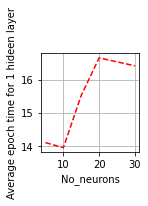

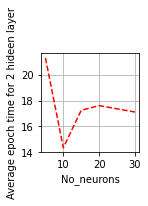

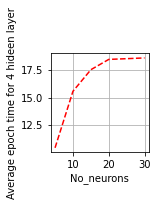

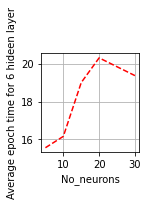

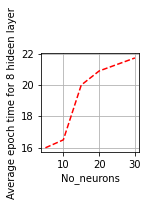

In [21]:
no_neurons=[5,10,15,20,30]

# For no. of hidden layers=1
epoch_times_5_neurons_1_layer=[14.871137651000026, 13.570384841001214, 13.88249884600009] #  I used early stopping in my program. So, only epoch times of those iterations are there, which gave a better RMSE than the previous one. 
epoch_times_10_neurons_1_layer=[14.685702896000294, 13.824583472000086, 13.550479282999731, 13.752716221999435]
epoch_times_15_neurons_1_layer=[16.119246821999695, 15.360740249001537, 15.284523345999332, 15.350034574999881]
epoch_times_20_neurons_1_layer=[17.868733545001305, 16.198592030999862, 16.308716334002384, 16.259773826997844]
epoch_times_30_neurons_1_layer=[17.32878567700027, 16.060801800998888, 16.172498924999672, 16.114753481000662, 16.416920325998944]

# For no. of hidden layers=2
epoch_times_5_neurons_2_layer=[21.697007921000477, 20.93782656300027, 20.91623797200009, 20.760044058999483, 21.89751109200006, 21.76080045499839]  
epoch_times_10_neurons_2_layer=[14.965459798997472, 14.385745997999038, 13.956001604998164, 14.06257141900278]
epoch_times_15_neurons_2_layer=[18.671506812999723, 16.603440939001302, 16.966852713001572, 16.77439511099874]
epoch_times_20_neurons_2_layer=[18.071632928997133, 18.73847734899755, 16.630607307997707, 17.02174010499948]
epoch_times_30_neurons_2_layer=[17.69449215699933, 17.14842911699816, 16.988785511999595, 16.810753286001272, 16.945490025002073]

# For no. of hidden layers=4
epoch_times_5_neurons_4_layer=[13.373188697158605, 9.703955928009178, 9.702230603159084, 9.70211630190503, 9.702114409491298]  
epoch_times_10_neurons_4_layer=[17.491342206998524, 14.988746151997475, 14.973542265001015, 14.820126185000845] 
epoch_times_15_neurons_4_layer=[18.168999838999298, 17.3939374770016, 17.21373718399991, 17.33145760199841] #This means, for 4 hidden layers with 15 neurons EACH, the number of elements in list is the number of epochs that took place, and epoch time is the entry in the list.
epoch_times_20_neurons_4_layer=[18.884539616003167, 18.373712567998155, 18.338266222999664, 18.251989608001168]
epoch_times_30_neurons_4_layer=[18.86760795200098, 17.947390000001178, 19.648128980003094, 18.522724637001375, 17.99134933499954]

# For no. of hidden layers=6
epoch_times_5_neurons_6_layer= [16.137721058999887, 16.31683720699948, 15.107018773000163, 15.034416644000885, 15.131612571000005] 
epoch_times_10_neurons_6_layer=[17.07463467100024, 16.008795460002148, 15.680057773999579, 15.831174379000004]
epoch_times_15_neurons_6_layer=[19.179884443001356, 18.779515409998567, 18.64876903699769, 19.421667107002577]
epoch_times_20_neurons_6_layer=[20.113473908000742, 19.56500863799738, 19.370590705999348, 22.231488797002385]
epoch_times_30_neurons_6_layer=[19.869464693001646, 18.99948091999977, 19.60865139299858, 19.292971265000233, 19.116937839997263]

# For no. of hidden layers=8
epoch_times_5_neurons_8_layer= [16.489735160001146, 15.804078242999822, 16.092863080000825, 16.147970229001658, 15.460394667999935, 15.913139457999932] 
epoch_times_10_neurons_8_layer=[17.05362054700163, 16.175794117996702, 16.54727813000136, 16.18309016800049]   
epoch_times_15_neurons_8_layer=[20.086583292002615, 20.26363766400027, 19.93664997900123, 19.666001457000675]
epoch_times_20_neurons_8_layer=[22.14329101399926, 20.464176825000322, 20.46212871899843, 20.482320358001743]
epoch_times_30_neurons_8_layer= [26.200624151002557, 20.902267943998595, 20.3123158840026, 20.517774078998627, 20.66734335699948]

avg_epoch_times_1_layer=[np.mean(epoch_times_5_neurons_1_layer),np.mean(epoch_times_10_neurons_1_layer),np.mean(epoch_times_15_neurons_1_layer),np.mean(epoch_times_20_neurons_1_layer),np.mean(epoch_times_30_neurons_1_layer)] 
avg_epoch_times_2_layer=[np.mean(epoch_times_5_neurons_2_layer),np.mean(epoch_times_10_neurons_2_layer),np.mean(epoch_times_15_neurons_2_layer),np.mean(epoch_times_20_neurons_2_layer),np.mean(epoch_times_30_neurons_2_layer)] 
avg_epoch_times_4_layer=[np.mean(epoch_times_5_neurons_4_layer),np.mean(epoch_times_10_neurons_4_layer),np.mean(epoch_times_15_neurons_4_layer),np.mean(epoch_times_20_neurons_4_layer),np.mean(epoch_times_30_neurons_4_layer)] 
avg_epoch_times_6_layer=[np.mean(epoch_times_5_neurons_6_layer),np.mean(epoch_times_10_neurons_6_layer),np.mean(epoch_times_15_neurons_6_layer),np.mean(epoch_times_20_neurons_6_layer),np.mean(epoch_times_30_neurons_6_layer)] 
avg_epoch_times_8_layer=[np.mean(epoch_times_5_neurons_8_layer),np.mean(epoch_times_10_neurons_8_layer),np.mean(epoch_times_15_neurons_8_layer),np.mean(epoch_times_20_neurons_8_layer),np.mean(epoch_times_30_neurons_8_layer)] 

plt.figure()
plt.subplot(231)
plt.grid(True)
plt.plot(no_neurons,avg_epoch_times_1_layer,'r--')
plt.xlabel('No_neurons')
plt.ylabel('Average epoch time for 1 hideen layer')

plt.figure()
plt.subplot(232)
plt.grid(True)
plt.plot(no_neurons,avg_epoch_times_2_layer,'r--')
plt.xlabel('No_neurons')
plt.ylabel('Average epoch time for 2 hideen layer')

plt.figure()
plt.subplot(233)
plt.grid(True)
plt.plot(no_neurons,avg_epoch_times_4_layer,'r--')
plt.xlabel('No_neurons')
plt.ylabel('Average epoch time for 4 hideen layer')

plt.figure()
plt.subplot(234)
plt.grid(True)
plt.plot(no_neurons,avg_epoch_times_6_layer,'r--')
plt.xlabel('No_neurons')
plt.ylabel('Average epoch time for 6 hideen layer')

plt.figure()
plt.subplot(235)
plt.grid(True)
plt.plot(no_neurons,avg_epoch_times_8_layer,'r--')
plt.xlabel('No_neurons')
plt.ylabel('Average epoch time for 8 hideen layer')


Text(0, 0.5, 'Average epoch time for N=30')

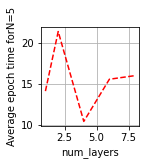

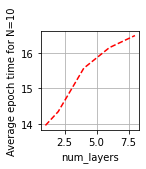

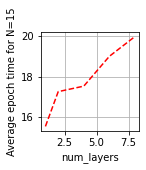

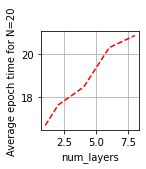

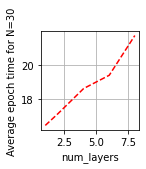

In [22]:
num_layers=[1,2,4,6,8]
l1=[np.mean(epoch_times_5_neurons_1_layer),np.mean(epoch_times_5_neurons_2_layer),np.mean(epoch_times_5_neurons_4_layer),np.mean(epoch_times_5_neurons_6_layer),np.mean(epoch_times_5_neurons_8_layer)]
l2=[np.mean(epoch_times_10_neurons_1_layer),np.mean(epoch_times_10_neurons_2_layer),np.mean(epoch_times_10_neurons_4_layer),np.mean(epoch_times_10_neurons_6_layer),np.mean(epoch_times_10_neurons_8_layer)]
l3=[np.mean(epoch_times_15_neurons_1_layer),np.mean(epoch_times_15_neurons_2_layer),np.mean(epoch_times_15_neurons_4_layer),np.mean(epoch_times_15_neurons_6_layer),np.mean(epoch_times_15_neurons_8_layer)]
l4=[np.mean(epoch_times_20_neurons_1_layer),np.mean(epoch_times_20_neurons_2_layer),np.mean(epoch_times_20_neurons_4_layer),np.mean(epoch_times_20_neurons_6_layer),np.mean(epoch_times_20_neurons_8_layer)]
l5=[np.mean(epoch_times_30_neurons_1_layer),np.mean(epoch_times_30_neurons_2_layer),np.mean(epoch_times_30_neurons_4_layer),np.mean(epoch_times_30_neurons_6_layer),np.mean(epoch_times_30_neurons_8_layer)]

plt.figure()
plt.subplot(231)
plt.grid(True)
plt.plot(num_layers,l1,'r--')
plt.xlabel('num_layers')
plt.ylabel('Average epoch time forN=5')

plt.figure()
plt.subplot(232)
plt.grid(True)
plt.plot(num_layers,l2,'r--')
plt.xlabel('num_layers')
plt.ylabel('Average epoch time for N=10')

plt.figure()
plt.subplot(233)
plt.grid(True)
plt.plot(num_layers,l3,'r--')
plt.xlabel('num_layers')
plt.ylabel('Average epoch time for N=15')

plt.figure()
plt.subplot(234)
plt.grid(True)
plt.plot(num_layers,l4,'r--')
plt.xlabel('num_layers')
plt.ylabel('Average epoch time for N=20')

plt.figure()
plt.subplot(235)
plt.grid(True)
plt.plot(num_layers,l5,'r--')
plt.xlabel('num_layers')
plt.ylabel('Average epoch time for N=30')
